Kaan Başpınar

mail adress: kbaspinar@tarla-fel.org

This code will be used to analyze the data for Martin-Puplett Interferometer

Data are generated by using the link: https://apps.automeris.io/

To get the data, I used the image from Fig 7 (top) (FERMILAB-PUB-08-115-AD)


We will measure signals (U_h and U_v). Then, using these signal we will create difference interferogram easily.





In [209]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import ifft, fftfreq, fft
from scipy.fft import irfft, rfftfreq, rfft


In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
import inspect

import numpy as np
import pandas as pd

class BeforeMPI:
    def __init__(self, filename="Interferogram.csv"):
        """
        BeforeMPI class reads data from an interferogram file.

        Attributes:
            filename (str): The filename of the data to be read.
            U_h (ndarray): Data from the horizontal detector.
            U_v (ndarray): Data from the vertical detector.
        """

        self.filename = filename
        self.x = None
        self.U_h = None
        self.U_v = None


    def read_data(self):
        """
        Read data from the specified file.

        Reads the data file containing the interferogram data and stores it.
        """
        self.df = pd.read_csv(self.filename, header=None, sep=",")
        self.x = np.array(self.df.iloc[1:, 0])  # Distance data
        self.U_h = np.array(self.df.iloc[1:, 1].astype(float))  # Data from horizontal detector
        self.U_v = np.array(self.df.iloc[1:, 2].astype(float))  # Data from vertical detector

    def difference_interferogram(self):
        """
        Calculate the difference interferogram.

        Computes the difference interferogram using data from horizontal and vertical detectors.
        Returns:
            ndarray: Difference interferogram.
        """
        self.delta = (self.U_h - self.U_v) / (self.U_h + self.U_v)


    def save_difference_interferogram(self, filename_dif="difference_interferogram.csv"):
      """
      Save the difference interferogram to a CSV file.

      Args:
          filename (str, optional): The filename to save the difference interferogram data. Default is "difference_interferogram.csv".
      """
      if hasattr(self, 'delta') and self.delta is not None:
          # Create a DataFrame containing distance data and difference interferogram values
          data = {
              "Distance": self.x,
              "Difference_Interferogram": self.delta
          }
          df = pd.DataFrame(data)

          # Save the DataFrame to a CSV file
          df.to_csv(filename_dif, index=False)
          print(f"Difference interferogram saved to {filename_dif}")
      else:
          print("Difference interferogram has not been calculated. Please calculate it first.")





    def help(self, method=None):
        """
        Provide help/documentation for class methods.

        Args:
            method (str, optional): Name of the method to get help for. If None, general class information is displayed.

        Returns:
            str: Help/documentation for the specified method.
        """
        if method is None:
            return inspect.getdoc(self)
        elif hasattr(self, method):
            return inspect.getdoc(getattr(self, method))
        else:
            return f"Method '{method}' not found in BeforeMPI class."




In [211]:
class MPI:
    def __init__(self, filename = "10pxDataset.csv"):
        """
        MPI class performs Fourier analysis, Monte Carlo integration, and plotting on interferogram data.

        Attributes:
            filename (str): The filename of the data to be read.
            df (DataFrame): DataFrame to store the read data.
            dt (ndarray): Time shift data in seconds.
            S (ndarray): Difference interferogram data in relative units.
            freq (ndarray): Frequencies from Fourier analysis.
            data (ndarray): Processed data for Fourier analysis.
            Iw (ndarray): Absolute value of the Fourier transformed data normalized to its maximum value.
            filtered_X (ndarray): Filtered frequencies.
            filtered_Y (ndarray): Filtered Fourier transformed data corresponding to filtered frequencies.
        """

        self.filename = filename
        self.df = None
        self.dt = None
        self.S = None
        self.freq = None
        self.data = None
        self.Iw = None
        self.filtered_X = None
        self.filtered_Y = None

    def read_data(self):
        """

        Read data from the specified file.

        Reads the data file containing difference interferogram data and stores it in a DataFrame.
        Converts time shift to seconds and difference interferogram to relative units.

        """
        self.df = pd.read_csv(self.filename, header=None, sep=",")
        self.dt = np.array(self.df.iloc[:, 0]) * 1e-12  # Convert picoseconds to seconds
        self.S = np.array(self.df.iloc[:, 1]) / 10  # Convert to relative units

    def fourier_analysis(self):
        """
        Perform Fourier analysis on the data.

        Computes the Fourier frequencies, performs Fourier transform,
        and normalizes the result to its maximum value.
        """

        sample_rate = len(self.dt) / (max(self.dt) - min(self.dt))
        self.freq = fftfreq(len(self.dt), 1 / sample_rate)
        self.data = self.S
        self.Iw1 = np.array(ifft(np.array(self.data))[:])
        self.Iw = np.abs(self.Iw1 / np.max(self.Iw1))

        # Filtered data where x is greater than 0
        self.filtered_X = np.array([x for x in self.freq if x > 0])
        self.filtered_Y = np.array([self.Iw[list(self.freq).index(x)] for x in self.filtered_X])

    def plot_interferogram(self):
        """
        Plot the difference interferogram.

        Plots the time shift against the difference interferogram.
        """
        plt.plot(self.dt[:], self.S[:], ".-b")
        plt.xlabel('$\Delta tau$')
        plt.ylabel('difference interferogram')
        plt.grid(True)
        plt.show()

    def plot_inverse_fourier_transform(self):
        """
        Plot the inverse Fourier transform.

        Plots the inverse Fourier transform of the difference interferogram.
        """
        plt.plot(self.filtered_X, self.filtered_Y, "o-r")
        plt.title("Inverse Cosine Fourier Transform of \nDifference Interferogram")
        plt.xlabel("Frequency (THz)")
        plt.ylabel("Intensity (arbitrary units)")
        plt.xlim([0, 1 * 10 ** 12])
        plt.grid()
        plt.show()

    def monte_carlo_integration(self, func, a, w, num_samples=1000):
      wp_samples = np.random.uniform(0, 100, num_samples)  # Adjust the range as needed
      integral = np.mean(func(wp_samples, a, w))

      return integral
      """
        Perform Monte Carlo integration.

        Args:
            func (function): Function to integrate.
            a (float): Value of 'a' in the function.
            w (float): Value of 'w' in the function.
            num_samples (int): Number of samples for integration.

        Returns:
            float: Result of the Monte Carlo integration.
       """



    def integrand(self, wp, a, w):
        return np.log(a / wp) / (w ** 2 - wp ** 2)
        """
        Define the integrand for Monte Carlo integration.

        Args:
            wp (float): Sample value.
            a (float): Value of 'a' in the function.
            w (float): Value of 'w' in the function.

        Returns:
            float: Value of the integrand at the given point.
        """

    def expression(self, a, w):
        """
        Define the expression for Monte Carlo integration.

        Args:
            a (float): Value of 'a' in the function.
            w (float): Value of 'w' in the function.

        Returns:
            complex: Result of the expression.
        """
        integral = self.monte_carlo_integration(self.integrand, a, w)
        return a * np.exp((1j * 2 * w / np.pi) * integral)

    def inverse_fourier_transform(self, w_values):
        """
        Compute and plot the inverse Fourier transform.

        Args:
            w_values (ndarray): Array of 'w' values for computation.
        """

        result = np.zeros((len(w_values), len(self.filtered_X)), dtype=complex)
        for i, w in enumerate(w_values):
            for j, a in enumerate(self.filtered_X):
                result[i, j] = self.expression(a, w)

        inverse_transform = ifft(result, axis=0)
        plt.figure(figsize=(10, 6))
        plt.plot(w_values, inverse_transform.real())
        plt.xlabel('w')
        plt.ylabel('Inverse Fourier Transform (Real part)')
        plt.title('Real part of the Inverse Fourier Transform')
        plt.grid(True)
        plt.show()


    def help(self, method=None):
      """
      Provide help/documentation for class methods.

      Args:
          method (str, optional): Name of the method to get help for. If None, general class information is displayed.

      Returns:
          str: Help/documentation for the specified method.
      """
      if method is None:
          return '\n'.join(
              f"Documentation for {name}:\n{inspect.getdoc(attr)}"
              for name, attr in self.__class__.__dict__.items() if callable(attr) and not name.startswith("__")
          )
      elif method == "all":
          return '\n'.join(
              f"Documentation for {name}:\n{inspect.getdoc(attr)}"
              for name, attr in self.__class__.__dict__.items() if callable(attr) and not name.startswith("__")
          )
      elif isinstance(method, str) and hasattr(self, method):
          return inspect.getdoc(getattr(self, method))
      else:
          return f"Method '{method}' not found in MPI class."

In [212]:
if __name__ == "__main__":
    # Create an instance of BeforeMPI
    before_mpi = BeforeMPI("Interferogram.csv")

    # Read data from the file
    before_mpi.read_data()

    # Calculate the difference interferogram
    before_mpi.difference_interferogram()

    # Access the x values and the difference interferogram values
    x = before_mpi.x
    delta_x = before_mpi.delta

    # Create a DataFrame with x and difference interferogram values
    data = {
        "x:":  x,
        "delta_x:": delta_x
    }
    df = pd.DataFrame(data)

    # Save the DataFrame to a CSV file
    df.to_csv('Try1.csv', index=False)  # Set index=False to exclude the DataFrame index from the output

    # Save the difference interferogram to another CSV file
    before_mpi.save_difference_interferogram(filename_dif="Diff.csv")


Difference interferogram saved to Diff.csv


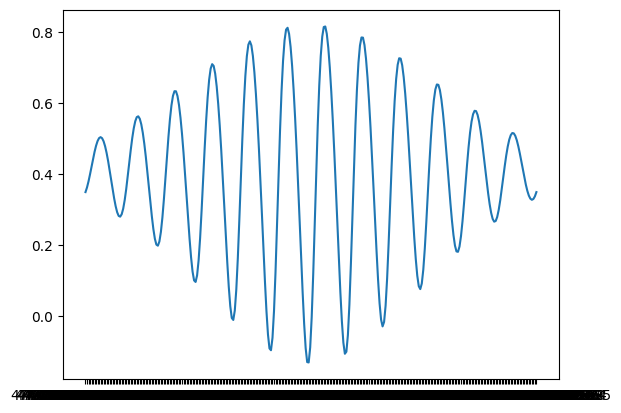

In [213]:
if __name__ == "__main__":
    # Create an instance of BeforeMPI
    before_mpi = BeforeMPI("Interferogram.csv")

    # Read data from the file
    before_mpi.read_data()

    # Calculate the difference interferogram
    before_mpi.difference_interferogram()

    # Access the x values and the difference interferogram values
    x = before_mpi.x
    delta = before_mpi.delta

    # Print the difference interferogram values
    plt.plot(x,delta)


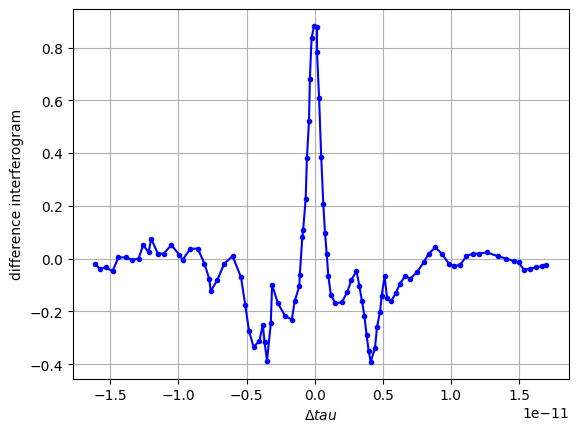

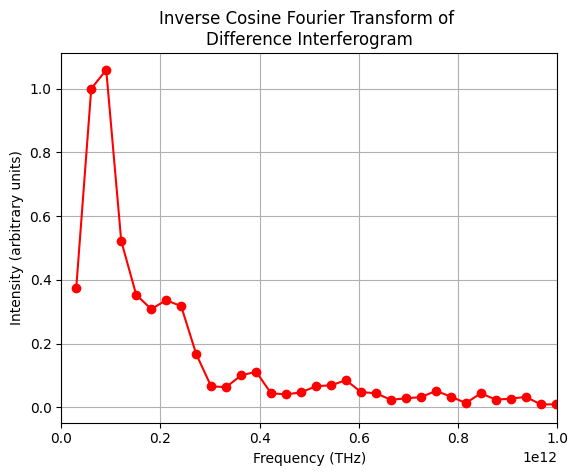

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


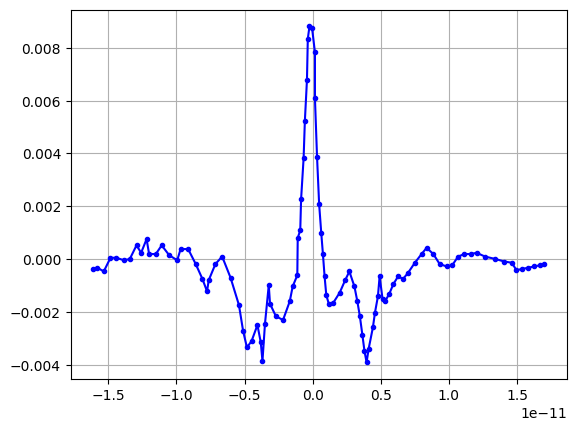

In [214]:
# Example usage:
if __name__ == "__main__":
    mpi = MPI("10pxDataset.csv")
    mpi.read_data()
    mpi.plot_interferogram()


    fourier = MPI()
    fourier.read_data()
    fourier.fourier_analysis()
    fourier.plot_inverse_fourier_transform()

    sig_reconstructed = ifft(fourier.Iw1)
    plt.plot(mpi.dt[::-1],sig_reconstructed,".-b")
    plt.grid()
    t = []
    for i in range(len(mpi.dt)-1):
      x = -5
      if i<len(mpi.dt)-2:
        res = mpi.dt[i+1]-mpi.dt[i]
        x+= res
      else:
        res = mpi.dt[i]-mpi.dt[:-2]
      t.append(x)


In [215]:
if __name__ == "__main__":
    # Create an instance of BeforeMPI
    before_mpi = BeforeMPI("Interferogram.csv")

    # Read data from the file
    before_mpi.read_data()

    # Calculate the difference interferogram
    before_mpi.difference_interferogram()

    # Access the x values and the difference interferogram values
    x = before_mpi.x
    delta_x = before_mpi.delta

    # Create a DataFrame with x and difference interferogram values
    data = {
        "x:":  x,
        "delta_x:": delta_x
    }
    df = pd.DataFrame(data)

    # Save the DataFrame to a CSV file
    df.to_csv('Try1.csv', index=False)  # Set index=False to exclude the DataFrame index from the output

    # Save the difference interferogram to another CSV file
    before_mpi.save_difference_interferogram(filename_dif="Diff.csv")


Difference interferogram saved to Diff.csv


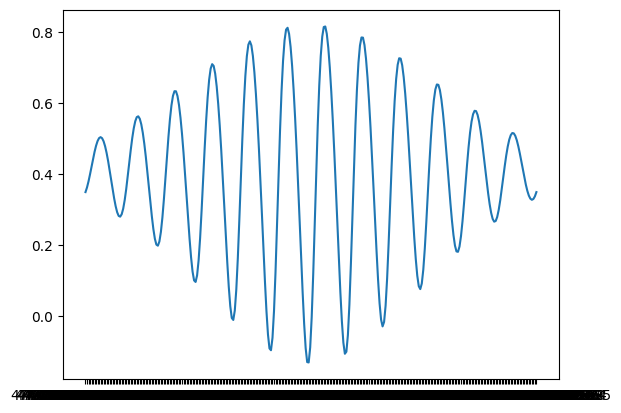

In [216]:
if __name__ == "__main__":
    # Create an instance of BeforeMPI
    before_mpi = BeforeMPI("Interferogram.csv")

    # Read data from the file
    before_mpi.read_data()

    # Calculate the difference interferogram
    before_mpi.difference_interferogram()

    # Access the x values and the difference interferogram values
    x = before_mpi.x
    delta = before_mpi.delta

    # Print the difference interferogram values
    plt.plot(x,delta)


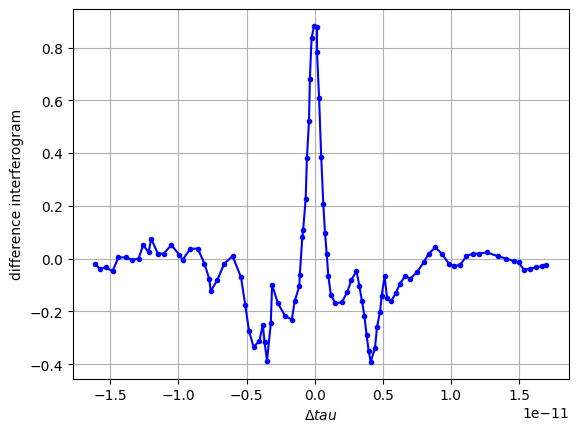

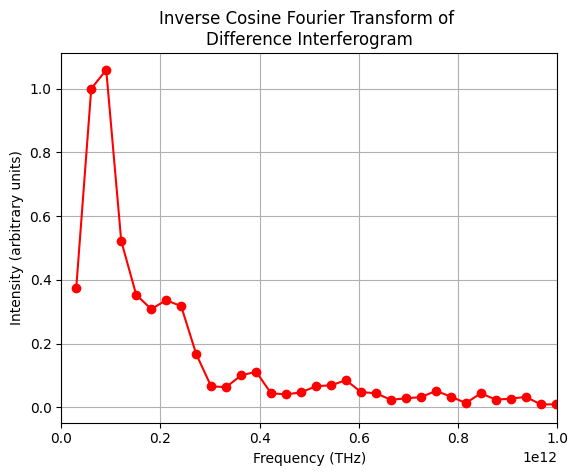

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


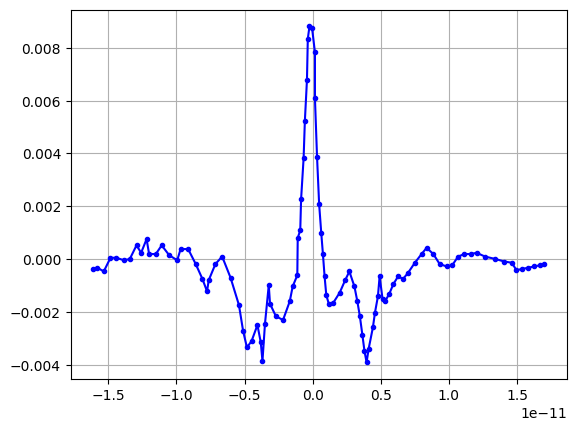

In [217]:
# Example usage:
if __name__ == "__main__":
    mpi = MPI("10pxDataset.csv")
    mpi.read_data()
    mpi.plot_interferogram()


    fourier = MPI()
    fourier.read_data()
    fourier.fourier_analysis()
    fourier.plot_inverse_fourier_transform()

    sig_reconstructed = ifft(fourier.Iw1)
    plt.plot(mpi.dt[::-1],sig_reconstructed,".-b")
    plt.grid()
    t = []
    for i in range(len(mpi.dt)-1):
      x = -5
      if i<len(mpi.dt)-2:
        res = mpi.dt[i+1]-mpi.dt[i]
        x+= res
      else:
        res = mpi.dt[i]-mpi.dt[:-2]
      t.append(x)


In [218]:
# I created a sample of detector data below. It is saved in Interferogram.csv
"""
x = np.linspace(47, 53, 300)
def symmetric_double_sided_damping_sinusoidal(x,phase):
    # Parameters
    amplitude = 1.0
    frequency = 2  # Adjust frequency to control the oscillation
    damping_factor = 0.2  # Damping factor

    # Symmetric double-sided damping sinusoidal function
    y = amplitude * np.exp(-damping_factor * (x - 50)**2) * np.sin(2 * np.pi * frequency * (x - phase))

    return y

y = symmetric_double_sided_damping_sinusoidal(x,0.1) + np.ones(len(x))*2
y2 = symmetric_double_sided_damping_sinusoidal(x,0.3) + np.ones(len(x))*1.5
U_h = y*1.8
U_v = y2

#plt.plot(x,U_h)
#plt.plot(x,U_v)
delta = (U_h - U_v)/(U_h + U_v)
plt.plot(x,delta)

data = {
    'x:' : x,
    'U_h': U_h,
    'U_v': U_v
}
df = pd.DataFrame(data)

# Write DataFrame to a CSV file
df.to_csv('Interferogram.csv', index=False)  # Set index=False to exclude the DataFrame index from the output
"""

"\nx = np.linspace(47, 53, 300)\ndef symmetric_double_sided_damping_sinusoidal(x,phase):\n    # Parameters\n    amplitude = 1.0\n    frequency = 2  # Adjust frequency to control the oscillation\n    damping_factor = 0.2  # Damping factor\n\n    # Symmetric double-sided damping sinusoidal function\n    y = amplitude * np.exp(-damping_factor * (x - 50)**2) * np.sin(2 * np.pi * frequency * (x - phase))\n\n    return y\n\ny = symmetric_double_sided_damping_sinusoidal(x,0.1) + np.ones(len(x))*2\ny2 = symmetric_double_sided_damping_sinusoidal(x,0.3) + np.ones(len(x))*1.5\nU_h = y*1.8\nU_v = y2\n\n#plt.plot(x,U_h)\n#plt.plot(x,U_v)\ndelta = (U_h - U_v)/(U_h + U_v)\nplt.plot(x,delta)\n\ndata = {\n    'x:' : x,\n    'U_h': U_h,\n    'U_v': U_v\n}\ndf = pd.DataFrame(data)\n\n# Write DataFrame to a CSV file\ndf.to_csv('Interferogram.csv', index=False)  # Set index=False to exclude the DataFrame index from the output\n"

            0         1
0  -16.101695 -0.188679
1  -15.793529 -0.377358
2  -15.331279 -0.330189
3  -14.838213 -0.471698
4  -14.406780  0.047170
..        ...       ...
95  15.362096 -0.424528
96  15.824345 -0.377358
97  16.255778 -0.330189
98  16.687211 -0.283019
99  16.995378 -0.235849

[100 rows x 2 columns]
100


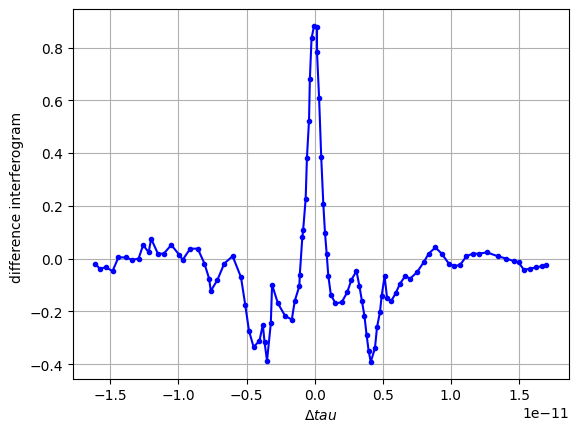

In [219]:
# Read the data file which contains difference interferogram data
df = pd.read_csv("10pxDataset.csv",header=None, sep = ",")
print(f"{df}")

# Convert time shift to seconds and difference interferogram to relative units
dt = np.array(df.iloc[:,0]) * 1e-12  # Convert picoseconds to seconds
S = np.array(df.iloc[:,1]) / 10  # Divide by 10 to convert to relative units
print(len(dt))

# Define padding size
# padding_size = 0

# Perform zero-padding
# This will help us to enhence th result.
#dt = np.array(np.pad(dt, (0, padding_size), 'constant'))
#S = np.array(np.pad(S, (0, padding_size), 'constant'))

# plot the
plt.plot(dt[:], S[:], ".-b")

plt.xlabel('$\Delta tau$ ')
plt.ylabel('difference interferogram ')
plt.grid(True)
plt.show()



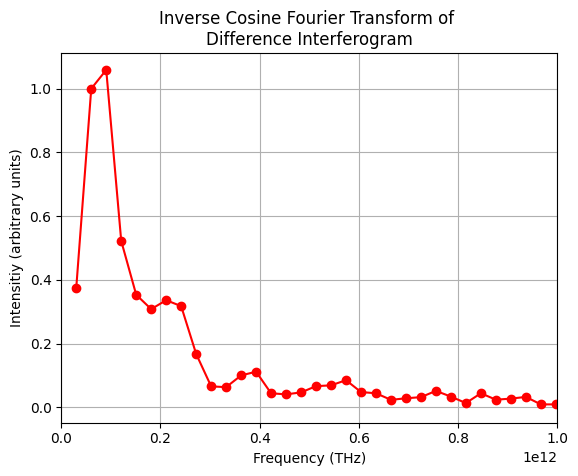

In [220]:
sample_rate = len(dt)/(max(dt) - min(dt))
freq = fftfreq(len(dt),1/sample_rate)

data = S

Iw1 = np.array(ifft(np.array(data))[:])
Iw = np.abs(Iw1/np.max(Iw1))

# Filtered data where x is greater than 0
filtered_X = np.array([x for x in freq if x > 0])
filtered_Y = np.array([Iw[list(freq).index(x)] for x in filtered_X])
#filtered_Y[0] , filtered_Y[1] = 1.2,1.1

plt.plot(filtered_X, filtered_Y,"o-r")
plt.title("Inverse Cosine Fourier Transform of \nDifference Interferogram")
plt.xlabel("Frequency (THz)")
plt.ylabel("Intensitiy (arbitrary units)")
plt.xlim([0,1*10**12])
plt.grid()
plt.show()

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# Define the integrand for Monte Carlo integration
def integrand(wp, a, w):
    return np.log(a / wp) / (w**2 - wp**2)

# Define the Monte Carlo integration function
def monte_carlo_integration(func, a, w, num_samples=1000):
    wp_samples = np.random.uniform(0, 100, num_samples)  # Adjust the range as needed
    integral = np.mean(func(wp_samples, a, w))
    return integral

# Define the expression
def expression(a, w):
    integral = monte_carlo_integration(integrand, a, w)
    return a * np.exp((1j * 2 * w / np.pi) * integral)

# Define the range of values for 'w'
w_values = np.linspace(0, 10, 1000)  # Adjust as needed

# Define the range of values for 'a(w)'
a_values = np.linspace(1, 10, 1000)  # Adjust as needed

# Compute the values of the expression for each 'w' and 'a(w)'
result = np.zeros((len(w_values), len(a_values)), dtype=complex)
for i, w in enumerate(w_values):
    for j, a in enumerate(a_values):
        result[i, j] = expression(a, w)
"""
# Plot the magnitude of the expression against 'w' and 'a(w)'
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(result.T), extent=[w_values.min(), w_values.max(), a_values.min(), a_values.max()],
           aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.xlabel('w')
plt.ylabel('a(w)')
plt.title('Magnitude of the Expression')
plt.show()
"""
# Now, let's compute the inverse Fourier transform of the expression
inverse_transform = ifft(result, axis=0)

# Plot the real part of the inverse Fourier transform against 'w'
plt.figure(figsize=(10, 6))
plt.plot(w_values, inverse_transform.real())
plt.xlabel('w')
plt.ylabel('Inverse Fourier Transform (Real part)')
plt.title('Real part of the Inverse Fourier Transform')
plt.grid(True)
plt.show()


TypeError: 'numpy.ndarray' object is not callable

<Figure size 1000x600 with 0 Axes>

In [ ]:
sig_reconstructed = ifft(Iw1)
plt.plot(dt[::-1],sig_reconstructed,".-b")
t = []
for i in range(len(dt)-1):
  x = -5
  if i<len(dt)-2:
    res = dt[i+1]-dt[i]
    x+= res
  else:
    res = dt[i]-dt[:-2]
  t.append(x)



In [ ]:
filtered_Y[0] , filtered_Y[1] = 1.2,1.1
plt.plot(filtered_X, np.sqrt(filtered_Y))




*   X: Δτ   (time seperation)
*   Y: δ(Τ) (difference interferogram)



δ(x)=  (U_h (x)-U_v (x))/(U_h (x)+U_v (x) )

In [ ]:
def difference_interferogram(U_h, U_v):
    delta = (U_h - U_v)/( U_h + U_v)
    return delta

The difference interferogram is the Fourier

*   The difference interferogram is the Fourier
*   To find Intensity spectrum, we need to apply inverse discrete cosine transform to the difference interferogram.



In [ ]:
def r_p(s,d,lamda):
    a = np.power(np.divide(2*s*freqs,3*10**8),2)
    b = np.power(np.log(s/(np.pi*d)),2)
    x = 1 + np.multiply(a,b)
    rp = np.power(x,-1/2)
    return rp

def rdik(s,d,freqs):
    a = (2* 3*10**8* s/freqs)**2
    b = np.pi**4 * d**4
    x = 1+ a/b
    rdik = x**-(1/2)
    return rdik

freqs = np.linspace(0,3,100) * 10**12
rp = abs(r_p(45*10**-6, 15*10**-6, freqs))
plt.plot(freqs,rp)
plt.grid()
plt.show()

In [ ]:
rd = abs(rdik(45*10**-6, 15*10**-6, freqs))
plt.plot(freqs,rd)
plt.grid()
plt.show()